# Task 1 

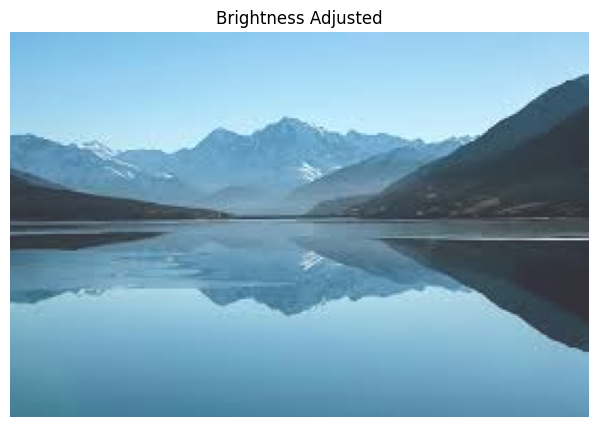

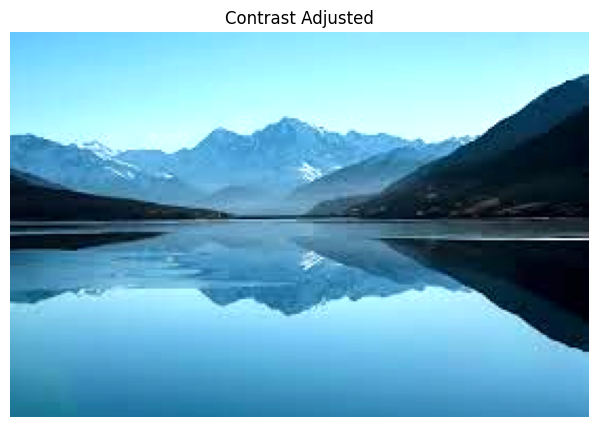

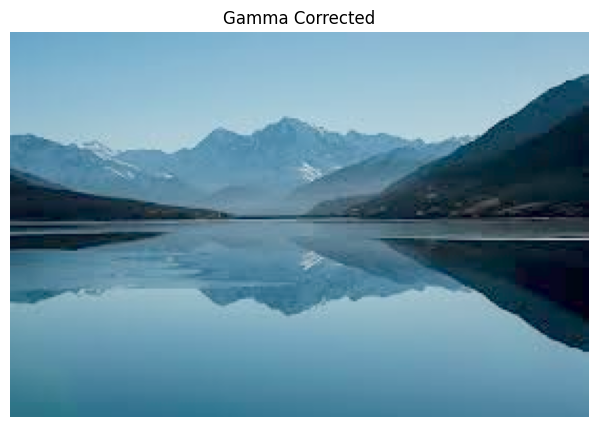

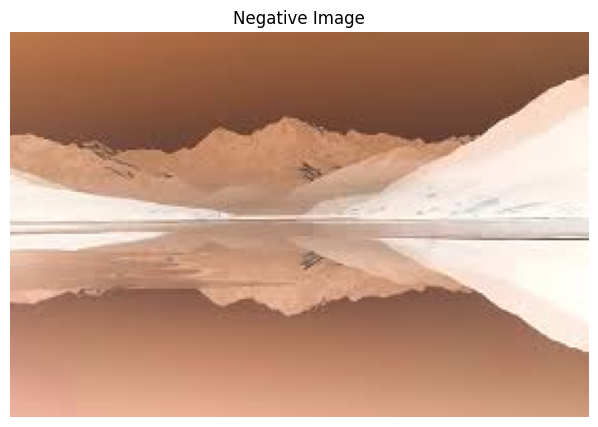

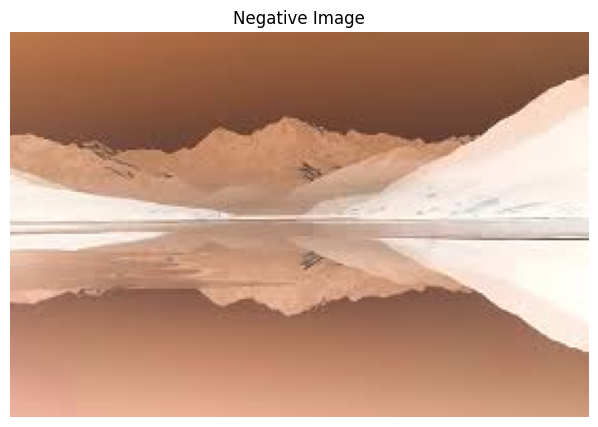

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(image, title):
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def brightness_adjustment(image, value):
    return cv2.add(image, value)

def contrast_adjustment(image, alpha, beta):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def inverse_transformation(image):
    return 255 - image

image = cv2.imread('Images/images.jpg')

bright_image = brightness_adjustment(image, 50)
contrast_image = contrast_adjustment(image, 1.5, 0)
gamma_image = gamma_correction(image, 1.5)
negative_image = inverse_transformation(image)

display_image(bright_image, 'Brightness Adjusted')
display_image(contrast_image, 'Contrast Adjusted')
display_image(gamma_image, 'Gamma Corrected')
display_image(negative_image, 'Negative Image')
display_image(negative_image, 'Negative Image')

# Task 2: Diadic Operations 

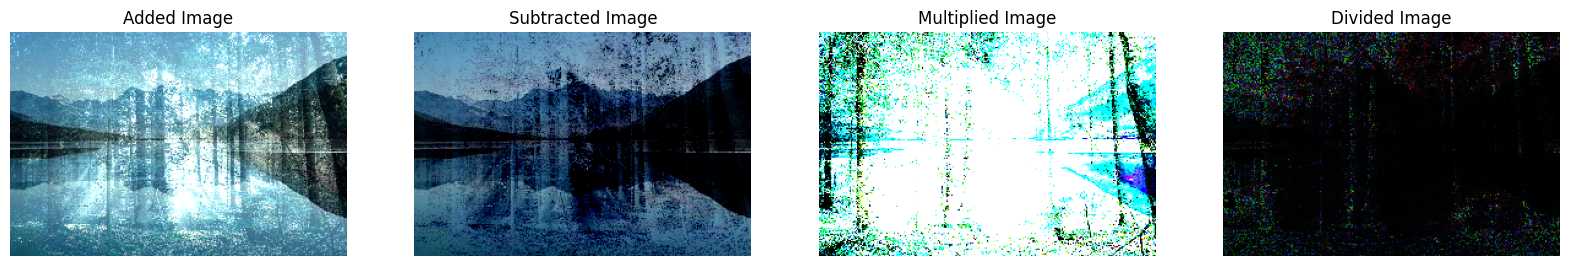

In [6]:

def display_images(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(20, 5))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(title)
        ax.axis('off')
    plt.show()

def add_images(image1, image2):
    return cv2.add(image1, image2)

def subtract_images(image1, image2):
    return cv2.subtract(image1, image2)

def multiply_images(image1, image2):
    return cv2.multiply(image1, image2)

def divide_images(image1, image2):
    return cv2.divide(image1, image2)

image1 = cv2.imread('Images/images.jpg')
image2 = cv2.imread('Images/blast2.jpg')

image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

added_image = add_images(image1, image2)
subtracted_image = subtract_images(image1, image2)
multiplied_image = multiply_images(image1, image2)
divided_image = divide_images(image1, image2)

images = [added_image, subtracted_image, multiplied_image, divided_image]
titles = ['Added Image', 'Subtracted Image', 'Multiplied Image', 'Divided Image']

display_images(images, titles)

# Task 3: Using Green Screens to Change Background 

the dimensions of the foreground image are:  (768, 1366, 3)


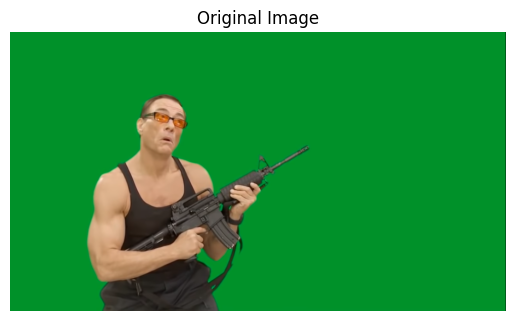

the dimensions of the background image are:  (768, 1366, 3)


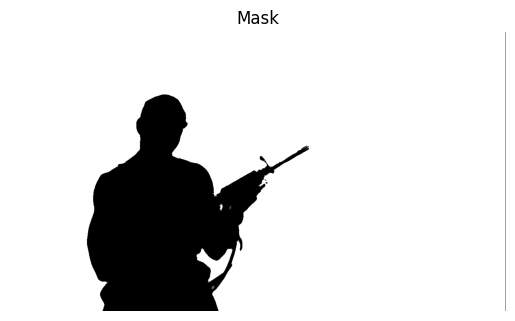

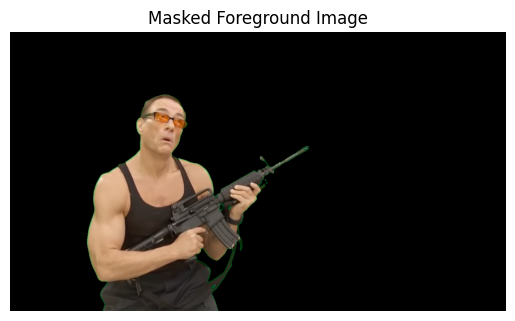

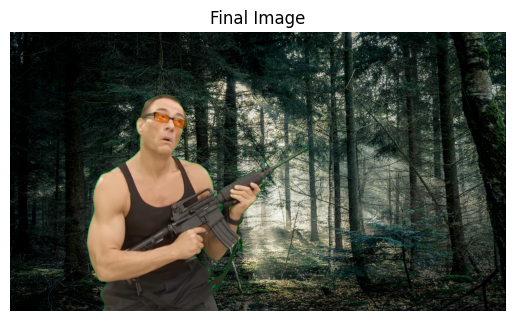

In [56]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread("Images/front image.png")
img_copy = np.copy(img)
img_copy = cv.cvtColor(img_copy, cv.COLOR_BGR2RGB)
print(f"the dimensions of the foreground image are: ", img_copy.shape)
plt.title('Original Image')
plt.axis('off')
plt.imshow(img_copy)
plt.show()

back_img = cv.imread("Images/blast2.jpg")
back_img_copy = cv.resize(back_img, img_copy.shape[1::-1])
back_img_copy = cv.cvtColor(back_img_copy, cv.COLOR_BGR2RGB)
print(f"the dimensions of the background image are: ", back_img_copy.shape)

upper = np.array([70, 255, 70]) 
lower = np.array([0, 100, 0])

mask = cv.inRange(img_copy, lower, upper)
plt.title('Mask')
plt.axis('off')
plt.imshow(mask, cmap="gray")
plt.show()

masked_image = np.copy(img_copy)
masked_image[mask != 0] = [0, 0, 0]
plt.title('Masked Foreground Image')
plt.axis('off')
plt.imshow(masked_image)
plt.show()

cropped_background_image = back_img_copy[0:768, 0:1366]
masked_background_image = np.copy(cropped_background_image)
masked_background_image [mask == 0] = [0,0,0]
plt.imshow(masked_background_image)


final_image = cv.add(masked_image,masked_background_image)
plt.title('Final Image')
plt.axis('off')
plt.imshow(final_image)
plt.show()

# Task 4: Vehicle Motion Detection

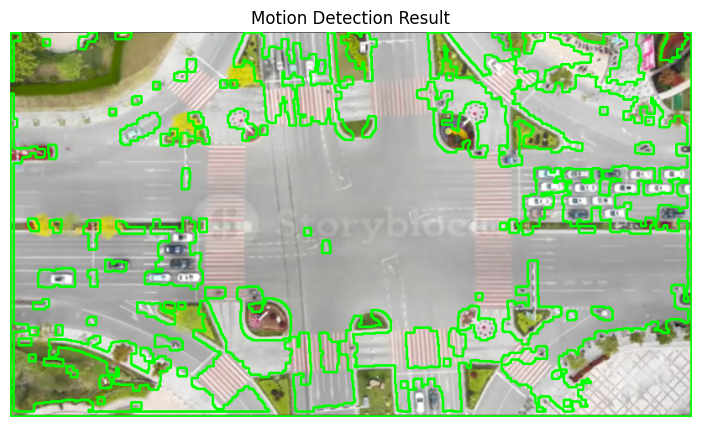

In [11]:
def detect_motion(frame1, frame2):
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    
    diff = cv2.absdiff(gray1, gray2)
    
    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
    
    kernel = np.ones((5,5), np.uint8)
    dilated = cv2.dilate(thresh, kernel, iterations=2)
    
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    result = frame1.copy()
    cv2.drawContours(result, contours, -1, (0, 255, 0), 2)
    
    return result

frame1 = cv2.imread('Images/MotionDetection/Picture1.png')
frame2 = cv2.imread('Images/MotionDetection/Picture2.png')

motion_result = detect_motion(frame1, frame2)

display_image(motion_result, 'Motion Detection Result')